In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
import os
os.chdir("/content/drive/voxforge") 

In [ ]:
import os
from pathlib import Path

%matplotlib inline
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import librosa
import librosa.display



```
# 此內容會顯示為程式碼
```



In [ ]:
def fetch_voxforge_data():
    ''' Fetch tar archive hosted from s3 bucket and untar it. '''
    root_url = 'http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/16kHz_16bit/'
    archive_tar = 'voxforge.tar.gz'
    data_archive = keras.utils.get_file(archive_tar, root_url + archive_tar, extract=True)
    return data_archive

In [ ]:
def is_valid(file_path):
    ''' returns True if a regular files. False for hidden files.
    Also, True is a known user with a name, False if anon.
    '''
    file_name = tf.strings.split(file_path, '/')[-1]
    if tf.strings.substr(file_name, 0, 1) == tf.constant(b'.'):
        return False
    sc = tf.strings.split(file_path, '/')[-3]
    speaker = tf.strings.split(sc, '-')[0]
    return not tf.strings.substr(speaker, 0, 9) == tf.constant(b'anonymous')

In [ ]:
list_ds = tf.data.Dataset.list_files(str("/content/drive/voxforge/"'*/wav/*.wav'))
list_ds = list_ds.filter(is_valid)
for f in list_ds.take(3):
  print(f.numpy())

b'/content/drive/voxforge/Otuyelu-20101107-crp/wav/b0217.wav'
b'/content/drive/voxforge/DavidL-20091116-kth/wav/b0059.wav'
b'/content/drive/voxforge/GamaBedolla-20150210-jbr/wav/b0404.wav'


In [ ]:
def extract_speaker(file_path):
    ''' extract speaker name from the file path '''
    sc = tf.strings.split(file_path, '/')[-3]
    return tf.strings.split(sc, '-')[0]

In [ ]:
speaker_ds = list_ds.map(extract_speaker)
for speaker in speaker_ds.take(50):
    print(speaker)

tf.Tensor(b'J0hnny_b14z3', shape=(), dtype=string)
tf.Tensor(b'ESimpray', shape=(), dtype=string)
tf.Tensor(b'ESimpray', shape=(), dtype=string)
tf.Tensor(b'Campbell', shape=(), dtype=string)
tf.Tensor(b'MARTIN0AMY', shape=(), dtype=string)
tf.Tensor(b'Kai', shape=(), dtype=string)
tf.Tensor(b'Kai', shape=(), dtype=string)
tf.Tensor(b'Otuyelu', shape=(), dtype=string)
tf.Tensor(b'Paddy', shape=(), dtype=string)
tf.Tensor(b'Otuyelu', shape=(), dtype=string)
tf.Tensor(b'ESimpray', shape=(), dtype=string)
tf.Tensor(b'DavidL', shape=(), dtype=string)
tf.Tensor(b'GamaBedolla', shape=(), dtype=string)
tf.Tensor(b'Paddy', shape=(), dtype=string)
tf.Tensor(b'bugsysservant', shape=(), dtype=string)
tf.Tensor(b'DavidL', shape=(), dtype=string)
tf.Tensor(b'bugsysservant', shape=(), dtype=string)
tf.Tensor(b'Hadlington', shape=(), dtype=string)
tf.Tensor(b'Otuyelu', shape=(), dtype=string)
tf.Tensor(b'Nadim', shape=(), dtype=string)
tf.Tensor(b'Nadim', shape=(), dtype=string)
tf.Tensor(b'MARTIN0AM

In [ ]:
speaker_encoder = preprocessing.LabelEncoder()
speaker_idx = speaker_encoder.fit_transform([bytes.decode(s.numpy()) for s in speaker_ds])
encoded_speaker_ds = tf.data.Dataset.from_tensor_slices(speaker_idx)
unique_speakers = len(speaker_encoder.classes_)
for es in encoded_speaker_ds.take(50):
    print(es)

tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(9, shape=(), 

In [ ]:
sample_audio = os.path.join("/content/drive/voxforge/", '/content/drive/voxforge/Campbell-20091230-set/wav/a0583.wav')
import IPython.display as ipd
ipd.Audio(sample_audio)

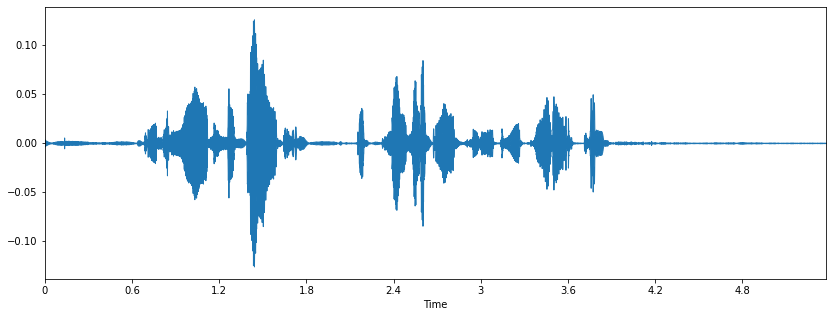

In [ ]:
x, sr = librosa.load(sample_audio)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

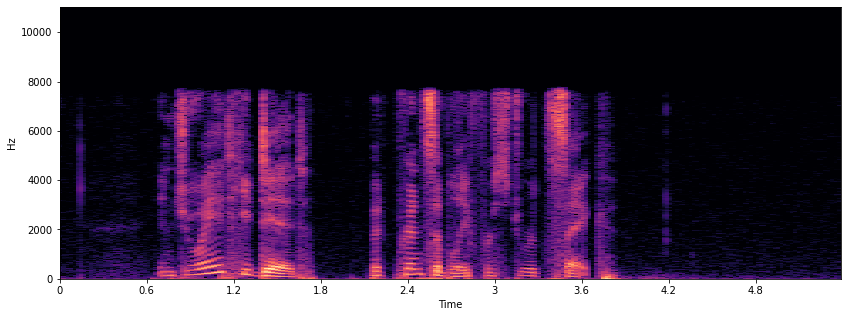

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
def wav2mfcc(file_path, max_pad_len=196):
    ''' convert wav file to mfcc matrix with truncation and padding '''
    wave, sample_rate = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sample_rate)
    mfcc = mfcc[:, :max_pad_len]
    pad_width = max_pad_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfcc

In [ ]:
def extract_mfcc(file_path):
    ''' returns 3D tensor of the mfcc coding from the wav file '''
    file_name = bytes.decode(file_path.numpy())
    mfcc = tf.convert_to_tensor(wav2mfcc(file_name))
    mfcc = tf.expand_dims(mfcc, 2)
    return mfcc

In [ ]:
def create_audio_ds(list_ds):
    ''' creates audio dataset containing audio tensors from file list dataset '''
    batch = []
    for f in list_ds:
        audio = extract_mfcc(f)
        batch.append(audio)
    return tf.data.Dataset.from_tensor_slices(batch)

In [ ]:
%time audio_ds = create_audio_ds(list_ds)

CPU times: user 4.63 s, sys: 15.6 s, total: 20.3 s
Wall time: 2min 48s


In [ ]:
for a in audio_ds.take(10):
    print(a.numpy().shape)

(20, 196, 1)
(20, 196, 1)
(20, 196, 1)
(20, 196, 1)
(20, 196, 1)
(20, 196, 1)
(20, 196, 1)
(20, 196, 1)
(20, 196, 1)
(20, 196, 1)


In [ ]:
complete_labeled_ds = tf.data.Dataset.zip((audio_ds, encoded_speaker_ds))

In [ ]:
input_shape = None
for audio, speaker in complete_labeled_ds.take(1):
    input_shape = audio.shape
    print('input_shape', audio.shape)
    print('output_shape', speaker.shape)

input_shape (20, 196, 1)
output_shape ()


In [ ]:
labeled_ds = complete_labeled_ds

In [ ]:
data_size = sum([1 for _ in labeled_ds])
train_size = int(data_size * 0.9)
val_size = int(data_size * 0.05)
test_size = data_size - train_size - val_size
print('all samples: {}'.format(data_size))
print('training samples: {}'.format(train_size))
print('validation samples: {}'.format(val_size))
print('test samples: {}'.format(test_size))

all samples: 150
training samples: 135
validation samples: 7
test samples: 8


In [ ]:
batch_size = 32
labeled_ds = labeled_ds.shuffle(data_size, seed=42)
train_ds = labeled_ds.take(train_size).shuffle(1000).batch(batch_size).prefetch(1)
val_ds = labeled_ds.skip(train_size).take(val_size).batch(batch_size).prefetch(1)
test_ds = labeled_ds.skip(train_size + val_size).take(test_size).batch(batch_size).prefetch(1)

In [ ]:
def create_model():
    dropout_rate = .25
    regularazation = 0.001
    audio_input = keras.layers.Input(shape=input_shape)
    conv1 = keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same',
                               activation='relu', input_shape=input_shape)(audio_input)
    maxpool1 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(conv1)
    batch1 = keras.layers.BatchNormalization()(maxpool1)
    conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same',
                               activation='relu', input_shape=input_shape)(batch1)
    maxpool2 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(conv2)
    batch2 = keras.layers.BatchNormalization()(maxpool2)
    conv3 = keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', 
                activation='relu')(batch2)
    maxpool3 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(conv3)
    batch3 = keras.layers.BatchNormalization()(maxpool3)
    flt = keras.layers.Flatten()(batch3)
    drp1 = keras.layers.Dropout(dropout_rate)(flt)
    dense1 = keras.layers.Dense(unique_speakers * 2, activation='relu',
                kernel_regularizer=keras.regularizers.l2(regularazation))(drp1)
    drp2 = keras.layers.Dropout(dropout_rate)(dense1)
    output = keras.layers.Dense(unique_speakers, activation='softmax', name='speaker')(drp2)
    model = keras.Model(inputs=audio_input, outputs=output)
    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['acc'])
    return model

In [ ]:
train_model = False
model_name = 'spr_model.h5'
model_path = os.path.join('.', model_name)
model = None
if os.path.exists(model_path):
    model = keras.models.load_model(model_path)
else:
    model = create_model()
    train_model = True

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 196, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 196, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 98, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 98, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 98, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 49, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 49, 32)         128   

In [ ]:
if train_model:
    root_logdir = os.path.join(os.curdir, "spr_logs")
    def get_run_dir():
        import time
        run_id = time.strftime("run%Y_%m_%d-%H_%M_%S")
        return os.path.join(root_logdir, run_id)
    run_logdir = get_run_dir()
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir, update_freq='batch')
    history = model.fit(train_ds, epochs=70, validation_data=val_ds, callbacks=[tensorboard_cb])

Epoch 1/70
5/5 [==============================] - 56s 6s/step - loss: 3.4877 - acc: 0.0284 - val_loss: 3.2784 - val_acc: 0.1429
Epoch 2/70
5/5 [==============================] - 0s 19ms/step - loss: 2.7412 - acc: 0.1120 - val_loss: 3.5268 - val_acc: 0.0000e+00
Epoch 3/70
5/5 [==============================] - 0s 19ms/step - loss: 2.6174 - acc: 0.1276 - val_loss: 3.7100 - val_acc: 0.2857
Epoch 4/70
5/5 [==============================] - 0s 19ms/step - loss: 2.5915 - acc: 0.1465 - val_loss: 4.1807 - val_acc: 0.0000e+00
Epoch 5/70
5/5 [==============================] - 0s 19ms/step - loss: 2.5922 - acc: 0.1082 - val_loss: 2.9904 - val_acc: 0.1429
Epoch 6/70
5/5 [==============================] - 0s 19ms/step - loss: 2.5199 - acc: 0.1595 - val_loss: 2.8465 - val_acc: 0.1429
Epoch 7/70
5/5 [==============================] - 0s 19ms/step - loss: 2.3644 - acc: 0.2467 - val_loss: 3.4076 - val_acc: 0.0000e+00
Epoch 8/70
5/5 [==============================] - 0s 20ms/step - loss: 2.2927 - acc: 0

In [ ]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 89ms/step - loss: 0.0868 - acc: 1.0000


[0.0868491381406784, 1.0]

In [ ]:
if train_model:
    model.save(model_name)

In [ ]:
sample_file = [os.path.join('/content/drive/voxforge/Aaron-20080318-kdl/wav/b0019.wav'),
               os.path.join('/content/drive/voxforge/bugsysservant-20091103-cob/wav/b0078.wav'),
               os.path.join('/content/drive/voxforge/Campbell-20091230-set/wav/a0583.wav'),
               os.path.join('/content/drive/voxforge/DavidL-20091116-kth/wav/b0056.wav'),
               os.path.join('/content/drive/voxforge/ESimpray-20150125-svl/wav/b0025.wav'),
               os.path.join('/content/drive/voxforge/Fandark-20100822-acy/wav/b0003.wav'),
               os.path.join('/content/drive/voxforge/GamaBedolla-20150210-jbr/wav/b0404.wav'),
               os.path.join('/content/drive/voxforge/Hadlington-20130720-pwc/wav/a0210.wav'),
               os.path.join('/content/drive/voxforge/J0hnny_b14z3-20111219-ibu/wav/b0051.wav'),
               os.path.join('/content/drive/voxforge/Kai-20111021-apo/wav/b0049.wav'),
               os.path.join('/content/drive/voxforge/L1ttl3J1m-20090701-fhz/wav/a0185.wav'),
               os.path.join('/content/drive/voxforge/MARTIN0AMY-20111106-pwg/wav/a0491.wav'),
               os.path.join('/content/drive/voxforge/Nadim-20100515-efk/wav/b0276.wav'),
               os.path.join('/content/drive/voxforge/Otuyelu-20101107-crp/wav/b0209.wav'),
               os.path.join('/content/drive/voxforge/Paddy-20100120-msy/wav/b0092.wav')]
sample_ds = tf.data.Dataset.from_tensor_slices(sample_file)
sample_input = create_audio_ds(sample_ds).batch(2)
output = model.predict(sample_input)

In [ ]:
speaker_ids = output.argmax(axis=1)
speakers = speaker_encoder.inverse_transform(speaker_ids)
print(speakers)
print(output)

['GamaBedolla' 'Fandark' 'ESimpray' 'Aaron' 'DavidL' 'Kai' 'bugsysservant'
 'GamaBedolla' 'GamaBedolla' 'Kai' 'GamaBedolla' 'Campbell' 'J0hnny_b14z3'
 'Otuyelu' 'Aaron']
[[1.29508006e-03 6.42424216e-04 1.20424747e-03 6.26080254e-09
  4.70808163e-06 9.94693100e-01 1.03762823e-05 6.37486210e-07
  2.87560518e-08 8.84626061e-08 2.66340550e-07 3.42764797e-05
  9.29613542e-09 9.10196861e-04 1.20442943e-03]
 [5.97895778e-05 3.68716486e-04 2.36985215e-05 1.13068536e-05
  9.99036193e-01 5.02517636e-08 1.54484394e-06 7.50792742e-06
  3.40245265e-06 4.28897256e-05 1.21247285e-06 3.10105293e-07
  2.67608179e-04 1.87285673e-06 1.74005836e-04]
 [2.08985584e-05 5.68564574e-04 3.63738363e-05 9.96204793e-01
  9.50635003e-05 3.00689353e-05 8.28273420e-04 1.33491567e-05
  7.54143985e-04 9.81519348e-04 1.99547736e-04 2.84917023e-05
  1.20871200e-05 2.26038959e-04 7.51837717e-07]
 [9.98226225e-01 2.37597342e-04 1.49567568e-05 1.01150090e-05
  1.01103412e-03 1.37251045e-05 1.85743280e-04 1.54656213e-04
  4.

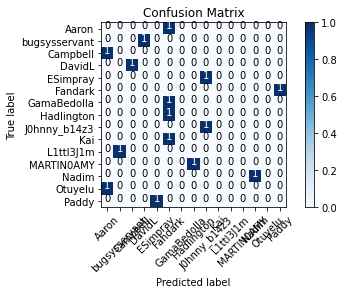

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
   plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
   plt.rcParams['axes.unicode_minus'] = False
   classes_name = ['Aaron', 'bugsysservant', 'Campbell', 'DavidL', 'ESimpray', 'Fandark', 'GamaBedolla', 'Hadlington', 'J0hnny_b14z3', 'Kai', 'L1ttl3J1m', 'MARTIN0AMY', 'Nadim', 'Otuyelu', 'Paddy']
   plt.figure()
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes_name))
   plt.xticks(tick_marks, classes_name, rotation=45)
   plt.yticks(tick_marks, classes_name)
   if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   thresh = cm.max() / 2
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   plt.savefig('Confusion Matrix.png')

labels = ['Aaron', 'bugsysservant', 'Campbell', 'DavidL', 'ESimpray', 'Fandark', 'GamaBedolla', 'Hadlington', 'J0hnny_b14z3', 'Kai', 'L1ttl3J1m', 'MARTIN0AMY', 'Nadim', 'Otuyelu', 'Paddy']
labels = np.array(labels)
results = model.predict(test_ds) # X_test是測試資料
cm = confusion_matrix(labels, speakers) # labels為分類名稱的array，results是測試結果
plot_confusion_matrix(cm, range(0, 5)) # range(0, 5)表示有5個分類